   encoder__gender_Male  encoder__car_ownership_1  encoder__car_ownership_2  \
0                     1                         0                         0   
1                     1                         1                         0   
2                     0                         0                         0   
3                     1                         1                         0   
4                     0                         1                         0   
5                     1                         0                         1   
6                     0                         0                         1   
7                     0                         1                         0   
8                     1                         0                         0   
9                     0                         1                         0   

   encoder__transportation_Car  encoder__transportation_Train  \
0                            0                              0   


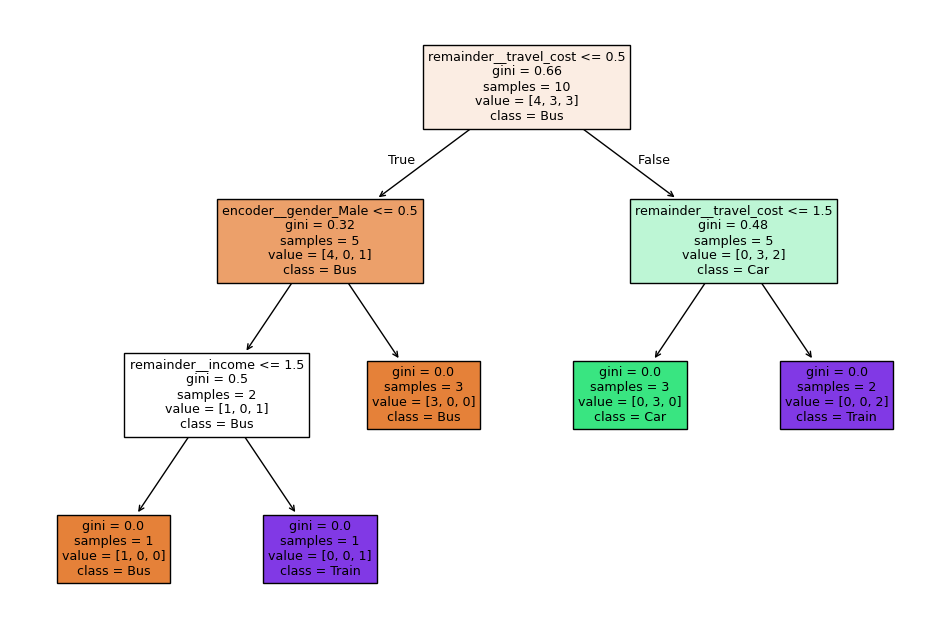

In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Data
data = pd.DataFrame({
    'gender': ['Male', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Female', 'Male', 'Female'],
    'car_ownership': [0, 1, 0, 1, 1, 2, 2, 1, 0, 1],
    'travel_cost': ['Cheap', 'Cheap', 'Cheap', 'Cheap', 'Expensive', 'Expensive', 'Expensive', 'Cheap', 'Standard', 'Standard'],
    'income': ['Low', 'Medium', 'Low', 'Medium', 'High', 'Medium', 'High', 'Medium', 'Medium', 'Medium'],
    'transportation': ['Bus', 'Bus', 'Bus', 'Bus', 'Car', 'Car', 'Car', 'Train', 'Train', 'Train']
})

# Inisialisasi LabelEncoder untuk income dan travel_cost
le = LabelEncoder()
data['income'] = le.fit_transform(data['income'])
data['travel_cost'] = le.fit_transform(data['travel_cost'])

# Inisialisasi OneHotEncoder untuk gender, car_ownership, dan transportation
encoder = OneHotEncoder(drop='first', sparse_output=False, dtype=int)  # Pastikan output adalah integer

# Kolom-kolom yang akan di-encode
categorical_columns = ['gender', 'car_ownership', 'transportation']

# Membuat transformer
ct = ColumnTransformer([('encoder', encoder, categorical_columns)], remainder='passthrough')

# Terapkan encoding
encoded_data = ct.fit_transform(data)

# Mendapatkan nama kolom hasil encoding dari ColumnTransformer
encoded_columns_names = ct.get_feature_names_out()

# Membuat DataFrame baru dari hasil encoding
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns_names)

# Mengonversi semua nilai dalam DataFrame menjadi tipe integer
encoded_df = encoded_df.astype(int)

# Menampilkan Data yang telah terencode
print(encoded_df)

# Menentukan target dan fitur
target_column_names = [col for col in encoded_columns_names if 'transportation' in col]
X = encoded_df.drop(columns=target_column_names)  # Features (hapus target yang sudah di-encode)
y = data['transportation']  # Target (transportation)

# Membuat dan melatih model Decision Tree tanpa split data
model = DecisionTreeClassifier(criterion='gini', random_state=42)
model.fit(X, y)

# Visualisasi pohon keputusan
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, class_names=model.classes_, filled=True)
plt.show()


In [7]:
data.head()

,gender,car_ownership,travel_cost,income,transportation
0,Male,0,0,1,Bus
1,Male,1,0,2,Bus
2,Female,0,0,1,Bus
3,Male,1,0,2,Bus
4,Female,1,1,0,Car
